In [1]:
import pickle
import numpy as np

In [2]:
plot_to_pdf = True

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    title_font_size = 12
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
res = pickle.load(open('../scripts/example_satellite.p', 'rb'))

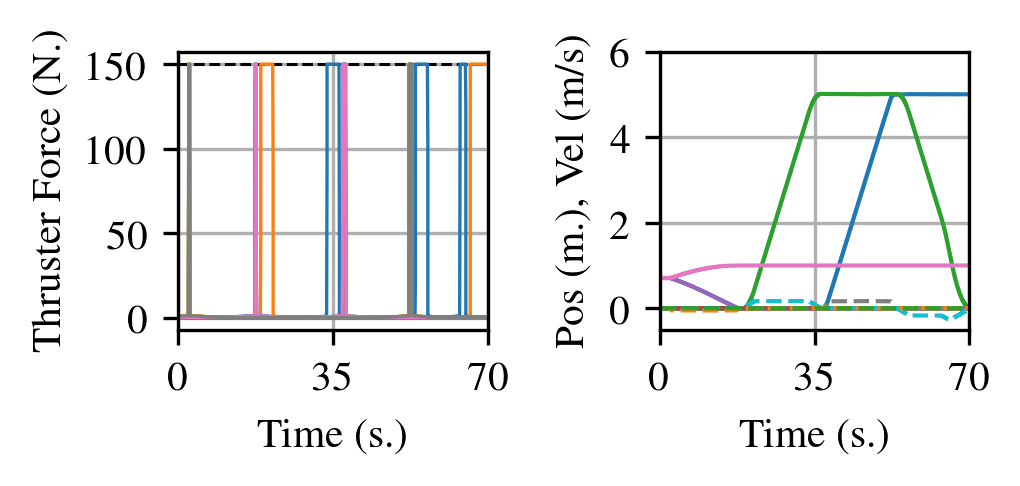

In [22]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(3.5, 1.7)
fig.set_dpi(300)

# fig, ax = plt.subplots(1, 2, figsize=(14, 7))


plt.subplot(1,2,1)
# thrusters
plt.plot(res['times'], res['solution'], linewidth=0.8)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s.)')
plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 70, 3))
plt.yticks([0, 50, 100, 150])
plt.xlim(0, 70)
plt.hlines(150, 0, 70, linestyle='dashed', linewidth=0.7)


plt.subplot(1,2,2)
# states
plt.plot([0] + list(res['times']), res['trajectory'].T[:,:7], linewidth=1)
plt.plot([0] + list(res['times']), res['trajectory'].T[:,7:], linewidth=1, linestyle='dashed')
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,0], linewidth=3, color=colors[0], label='x')
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,1], linewidth=3, color=colors[1], label='y')
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,2], linewidth=3, color=colors[2], label='z')

# flipped because we rotated the satellite 
#   and velocitites are in the local frame
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,9], linewidth=3, color=colors[0])
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,8], linewidth=3, color=colors[1])
# ax[1].plot([0] + list(res['times']), res['trajectory'].T[:,7], linewidth=3, color=colors[2])
# ax[1].legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s.)')
plt.ylabel('Pos (m.), Vel (m/s)')
plt.xticks(np.linspace(0, 70, 3))
plt.yticks([0, 2, 4, 6])
plt.xlim(0, 70)

plt.tight_layout()
plt.savefig('sat_trajectory.pdf')

In [5]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

x y z    a b c d   vx vy vz   va vb vc
0 1 2    3 4 5 6    7  8  9   10 11 12

In [10]:
res2 = pickle.load(open('../../../../exotica_examples/scripts/example_dynamic_time_indexed.p', 'rb'))

In [31]:
xvel2 = (res2['trajectory'][0,1:] - res2['trajectory'][0,:-1]) / (res2['times'][2] - res2['times'][0])
yvel2 = (res2['trajectory'][1,1:] - res2['trajectory'][1,:-1]) / (res2['times'][2] - res2['times'][0])

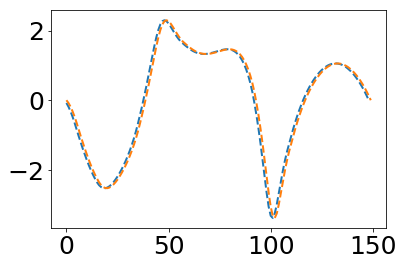

In [32]:
plt.plot(xvel2, linestyle='dashed',linewidth=2)
plt.plot(res2['trajectory'][2,:], linestyle='dashed',linewidth=2)


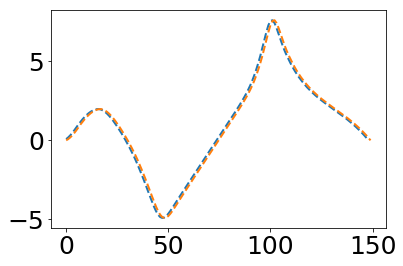

In [33]:
plt.plot(yvel2, linestyle='dashed',linewidth=2)
plt.plot(res2['trajectory'][3,:], linestyle='dashed',linewidth=2)